In [1]:
from model import *
import numpy as np

In [2]:
# Load cryptic seq data
seq_length = 46
file_path = 'data/cs_data.csv'
decoy_path = 'data/cs_data.csv'
X, y = read_data(file_path, decoy_path, decoy_mul=0.01)

# Mask the central dinucleotide from X
X = np.array([seq[:22] + 'NN' + seq[24:] for seq in X])

# Initialize the model
input_size = seq_length * 5  # 4 bases + N, one-hot encoded
hidden_size = 128
output_size = 1
model = DNAScorePredictor(input_size, hidden_size, output_size)

# Train the model
train_model(model, X, y, epochs=10, log=True)
print("Training completed!")

# Evaluate the model
y_hat = eval_model(model, X)

Epoch [10/10], Loss: 0.0920
Training completed!


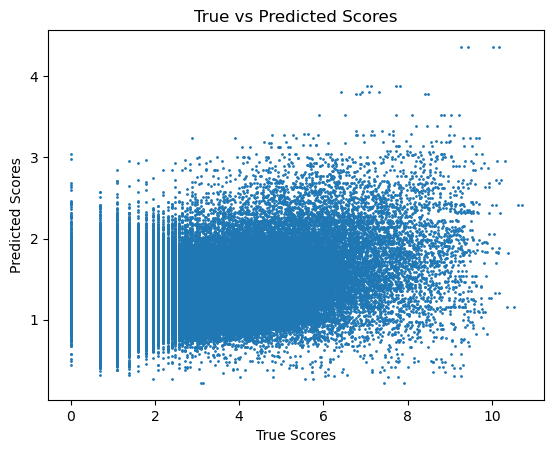

In [4]:
from matplotlib import pyplot as plt

plt.scatter(y, np.exp(y_hat), s=1)
plt.xlabel('True Scores')
plt.ylabel('Predicted Scores')
plt.title('True vs Predicted Scores')
plt.show()

